# CNN 1 - Working with Image data
- Dataset:
    - https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset

In [32]:
%ls PetImages

 Volume in drive C has no label.
 Volume Serial Number is 5638-BBBB

 Directory of C:\Users\Oluwaseun Alade\Desktop\Data Analysis\Tensor\TensorFlow-main\PetImages

2023-02-22  20:49    <DIR>          .
2023-02-22  20:49    <DIR>          ..
2023-02-22  20:49    <DIR>          Cat
2023-02-22  20:51    <DIR>          Dog
               0 File(s)              0 bytes
               4 Dir(s)  812,591,906,816 bytes free


In [50]:
%ls PetImages\Cat

 Volume in drive C has no label.
 Volume Serial Number is 5638-BBBB

 Directory of C:\Users\Oluwaseun Alade\Desktop\Data Analysis\Tensor\TensorFlow-main\PetImages\Cat

2023-02-22  20:49    <DIR>          .
2023-02-22  20:49    <DIR>          ..
2020-03-12  05:35            12,213 0.jpg
2020-03-12  05:35            16,868 1.jpg
2020-03-12  05:35            35,381 10.jpg
2020-03-12  05:35            30,725 100.jpg
2020-03-12  05:35            26,344 1000.jpg
2020-03-12  05:35           130,307 10000.jpg
2020-03-12  05:35            27,005 10001.jpg
2020-03-12  05:35            26,185 10002.jpg
2020-03-12  05:35            28,574 10003.jpg
2020-03-12  05:35           137,076 10004.jpg
2020-03-12  05:35            12,247 10005.jpg
2020-03-12  05:35            46,085 10006.jpg
2020-03-12  05:35            23,541 10007.jpg
2020-03-12  05:35            23,069 10008.jpg
2020-03-12  05:35            21,870 10009.jpg
2020-03-12  05:35            23,764 1001.jpg
2020-03-12  05:35            34,56

In [51]:
!ls PetImages/Dog | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


- Two folders (one per class), the data isn't split

In [78]:
# import libraries

import os
import random
import pathlib
import shutil
import matplotlib.pyplot as plt

- Set these variables however you want
- We'll later split the dataset into training/testing/validation sets with a 80:10:10 ratio

## Declaring Variables

In [53]:
# Distinct image classes
img_classes = ['cat', 'dog']

# Folders for training, testing, and validation subsets
dir_data  = pathlib.Path.cwd().joinpath('data')
dir_train = dir_data.joinpath('train')
dir_valid = dir_data.joinpath('validation')
dir_test  = dir_data.joinpath('test')

# Train/Test/Validation split config
pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1

<br>

## Making Folder Directory structure
- We want to have a folder that contains dedicated folders for training, testing, and validation images
- Each of these subfolders will have two folders inside - one for cats, and the other for dogs
- We'll declare a function which creates the directory structure:

In [64]:
def setup_folder_structure() -> None:
    # Create base folders if they don't exist
    if not dir_data.exists():  dir_data.mkdir()
    if not dir_train.exists(): dir_train.mkdir()
    if not dir_valid.exists(): dir_valid.mkdir()
    if not dir_test.exists():  dir_test.mkdir()
    
    # Create subfolders for each class
    for cls in img_classes:
        if not dir_train.joinpath(cls).exists(): dir_train.joinpath(cls).mkdir()
        if not dir_valid.joinpath(cls).exists(): dir_valid.joinpath(cls).mkdir()
        if not dir_test.joinpath(cls).exists():  dir_test.joinpath(cls).mkdir()
        
    # Print the directory structure
    # Credits - https://stackoverflow.com/questions/3455625/linux-command-to-print-directory-structure-in-the-form-of-a-tree
    dir_str = os.system('''ls -R data | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/' ''')
    print(dir_str)
    return

In [65]:
setup_folder_structure()

255


<br>

## Train/Test/Validation split
- It's recommended to have three subsets when training image models
    - **Training set** - The largest subset on which the model trains
    - **Validation sets** - A separate set used for evaluation during training
    - **Test set** - Used to perform a final test, images were never seen by the model
    
- We'll go over every image in cat or dog folder, and then create a random number between 0 and 1
    - If the random number is 0.80 or below, the image will belong to the training set
    - If the random number is between 0.80 and 0.90, the image will belong to the validation set
    - Else, the image will belong to the test set
    - You can use the `shutil` module to copy the images

In [72]:
def train_test_validation_split(src_folder: pathlib.PosixPath, class_name: str) -> dict:
    # For tracking
    n_train, n_valid, n_test = 0, 0, 0
    
    # Random seed for reproducibility
    random.seed(42)
    
    # Iterate over every image
    for file in src_folder.iterdir():
        img_name = str(file).split('\\')[-1]
        
        # Make sure it's JPG
        if file.suffix == '.jpg':
            # Generate a random number
            x = random.random()
            
            # Where should the image go?
            tgt_dir = ''
            
            # .80 or below
            if x <= pct_train:  
                tgt_dir = 'train'
                n_train += 1
                
            # Between .80 and .90
            elif pct_train < x <= (pct_train + pct_valid):  
                tgt_dir = 'validation'
                n_valid += 1
                
            # Above .90
            else:  
                tgt_dir = 'test'
                n_test += 1
                
            # Copy the image
            shutil.copy(
                src=file,
                # data/<train|valid|test>/<cat\dog>/<something>.jpg
                dst=dir_data.joinpath(tgt_dir).joinpath(class_name).joinpath(img_name)
                #dst=f'{str(dir_data)}/{tgt_dir}/{class_name}/{img_name}'       # modified line
            )
            
    return {
        'source': str(src_folder),
        'target': str(dir_data),
        'n_train': n_train,
        'n_validaiton': n_valid,
        'n_test': n_test
    }

In [75]:
%%time

# splitting cat data into the test, train, and validation directories.

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Cat'),
    class_name='cat'
)

CPU times: total: 32.6 s
Wall time: 5min 55s


{'source': 'C:\\Users\\Oluwaseun Alade\\Desktop\\Data Analysis\\Tensor\\TensorFlow-main\\PetImages\\Cat',
 'target': 'C:\\Users\\Oluwaseun Alade\\Desktop\\Data Analysis\\Tensor\\TensorFlow-main\\data',
 'n_train': 10016,
 'n_validaiton': 1239,
 'n_test': 1245}

In [77]:
%%time

# splitting dog into the test, train, and validation directories.

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Dog'),
    class_name='dog'
)

CPU times: total: 32 s
Wall time: 3min 10s


{'source': 'C:\\Users\\Oluwaseun Alade\\Desktop\\Data Analysis\\Tensor\\TensorFlow-main\\PetImages\\Dog',
 'target': 'C:\\Users\\Oluwaseun Alade\\Desktop\\Data Analysis\\Tensor\\TensorFlow-main\\data',
 'n_train': 10016,
 'n_validaiton': 1239,
 'n_test': 1245}

- It's not a perfect 80:10:10 split due to randomization, but it will do

<br>

## Visualizing images
- Always visualize the dataset when working with images
- This function plots a random subset of 10 images from a given directory
- The images are displayed in a grid of 2 rows and 5 columns:

In [79]:
def plot_random_sample(img_dir: pathlib.PosixPath):
    # How many images we're showing
    n = 10                            # Number of images to show
    # Get absolute paths to these N images
    imgs = random.sample(list(img_dir.iterdir()), n)
    
    # Make sure num_row * num_col = n
    num_row = 2
    num_col = 5   # 2 multiply by 5 must = n

    # Create a figure
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = plt.imread(str(imgs[i]))
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        # Set title as <train|test|validation>/<cat\dog>/<img_name>.jpg
        ax.set_title('/'.join(str(imgs[i]).split('/')[-3:]))

    plt.tight_layout()
    plt.show()

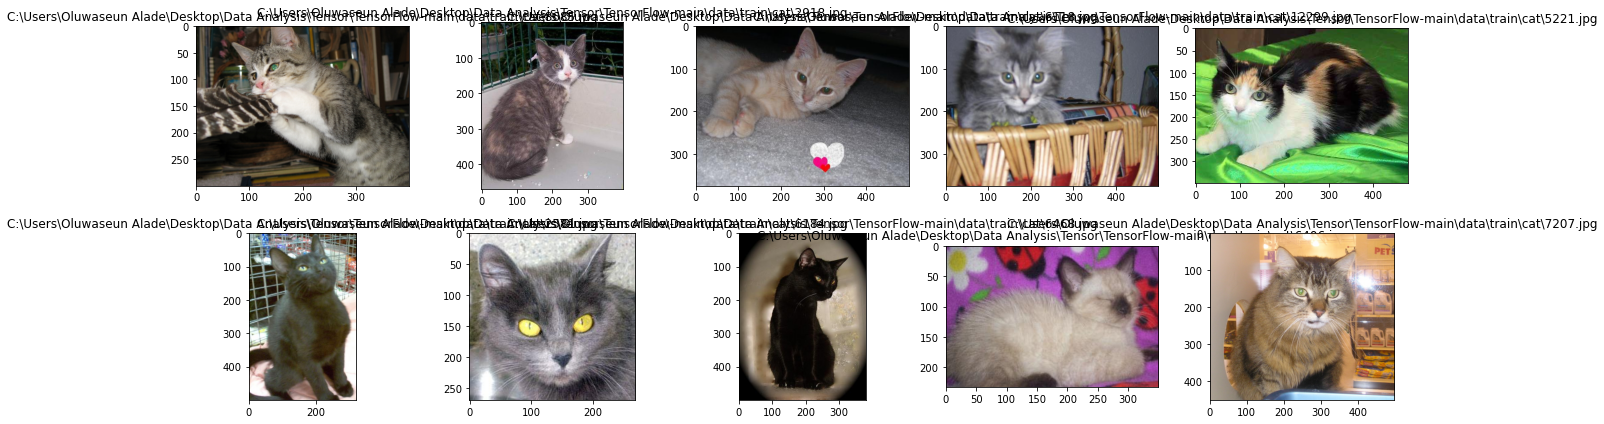

In [80]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/train/cat'))

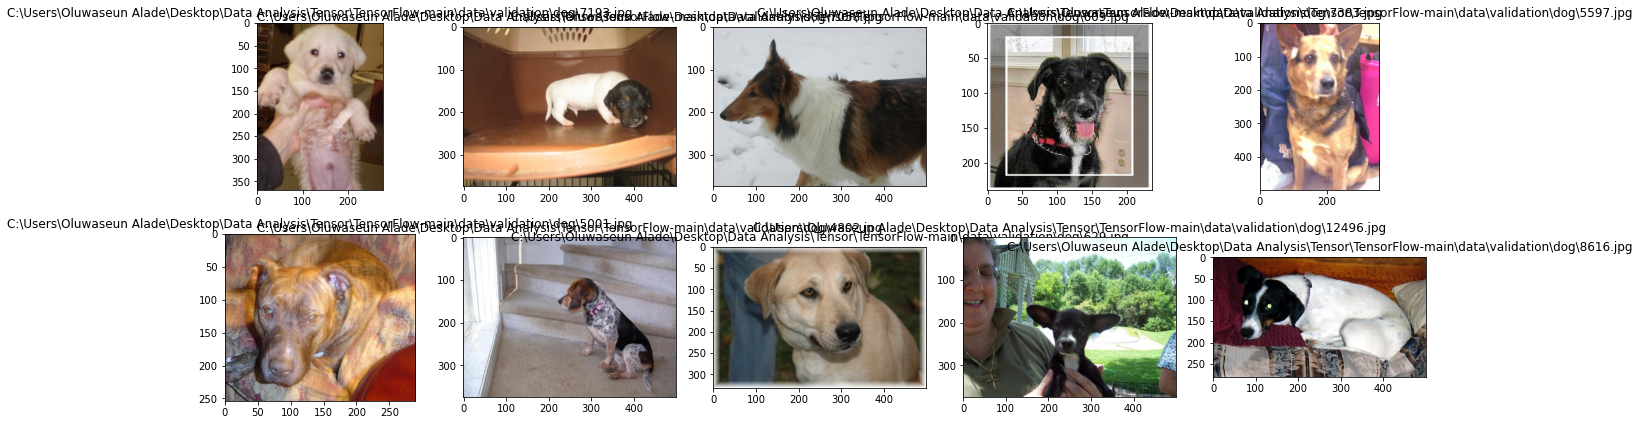

In [81]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/validation/dog'))

<br>

## What's next?
- We'll explore what image data actually is and how to work with it